# WeatherPy

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "Imperial"
api_key = weather_api_key 
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q="
#         city_url = url + "&q=" + i + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
        #print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
#         print(city_lat)
        city_lng = city_weather["coord"]["lon"]
#         print(city_lng)
        city_max_temp = city_weather["main"]["temp_max"]
#         print(city_max_temp)
        city_humidity = city_weather["main"]["humidity"]
#         print(city_humidity)
        city_clouds = city_weather["clouds"]["all"]
#         print(city_clouds)
        city_wind = city_weather["wind"]["speed"]
#         print(city_wind)
        city_country = city_weather["sys"]["country"]
#         print(city_country)
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        city_date = city_weather["dt"]
#         print(city_date)
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        time.sleep(1)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vangaindrano
Processing Record 2 of Set 1 | santa maria
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | pimentel
Processing Record 7 of Set 1 | key west
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | chara
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | popondetta
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | vardo
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | middlesbrough
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | yulara


Processing Record 36 of Set 4 | clarksburg
Processing Record 37 of Set 4 | port lincoln
Processing Record 38 of Set 4 | panzhihua
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | gat
Processing Record 41 of Set 4 | dakar
Processing Record 42 of Set 4 | yerbogachen
Processing Record 43 of Set 4 | anshun
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | north bend
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | sangar
Processing Record 48 of Set 4 | taltal
Processing Record 49 of Set 4 | chokurdakh
Processing Record 0 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 5 | keetmanshoop
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | asahikawa
Processing Record 4 of Set 5 | dongobesh
Processing Record 5 of Set 5 | baoqing
Processing Record 6 of Set 5 | kyren
Processing Record 7 of Set 5 | funadhoo
Processing 

Processing Record 23 of Set 8 | cabedelo
Processing Record 24 of Set 8 | eureka
Processing Record 25 of Set 8 | nampula
Processing Record 26 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 27 of Set 8 | rawah
Processing Record 28 of Set 8 | sobolevo
Processing Record 29 of Set 8 | novo aripuana
Processing Record 30 of Set 8 | elizabeth city
Processing Record 31 of Set 8 | kenora
Processing Record 32 of Set 8 | tuatapere
Processing Record 33 of Set 8 | buariki
City not found. Skipping...
Processing Record 34 of Set 8 | moron
Processing Record 35 of Set 8 | koungou
Processing Record 36 of Set 8 | sorada
Processing Record 37 of Set 8 | kurayoshi
Processing Record 38 of Set 8 | barreiras
Processing Record 39 of Set 8 | jaguey grande
Processing Record 40 of Set 8 | hualmay
Processing Record 41 of Set 8 | santa cruz del norte
Processing Record 42 of Set 8 | saleaula
City not found. Skipping...
Processing Record 43 of Set 8 | geraldton
Processing Record 44 of Set 8 | tri

Processing Record 11 of Set 12 | daxian
City not found. Skipping...
Processing Record 12 of Set 12 | coahuayana
Processing Record 13 of Set 12 | majene
Processing Record 14 of Set 12 | dzhebariki-khaya
Processing Record 15 of Set 12 | vilyuysk
Processing Record 16 of Set 12 | tebingtinggi
Processing Record 17 of Set 12 | thaba-tseka
Processing Record 18 of Set 12 | passagem franca
Processing Record 19 of Set 12 | nantucket
Processing Record 20 of Set 12 | tornio
Processing Record 21 of Set 12 | chapada dos guimaraes
Processing Record 22 of Set 12 | corrales
Processing Record 23 of Set 12 | khonuu
City not found. Skipping...
Processing Record 24 of Set 12 | praya
Processing Record 25 of Set 12 | burgersdorp
Processing Record 26 of Set 12 | viedma
Processing Record 27 of Set 12 | vikulovo
Processing Record 28 of Set 12 | balkhash
Processing Record 29 of Set 12 | taree
Processing Record 30 of Set 12 | hobyo
Processing Record 31 of Set 12 | romny
Processing Record 32 of Set 12 | kefamenanu

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vangaindrano,-23.3500,47.6000,71.55,94,96,4.97,MG,1671240189
1,santa maria,-29.6842,-53.8069,69.10,56,0,13.80,BR,1671240181
2,saint-philippe,-21.3585,55.7679,72.99,81,26,12.57,RE,1671240192
3,ushuaia,-54.8000,-68.3000,60.46,51,75,5.75,AR,1671240193
4,hilo,19.7297,-155.0900,81.28,82,100,3.44,US,1671240195


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vangaindrano,-23.3500,47.6000,71.55,94,96,4.97,MG,1671240189
1,santa maria,-29.6842,-53.8069,69.10,56,0,13.80,BR,1671240181
2,saint-philippe,-21.3585,55.7679,72.99,81,26,12.57,RE,1671240192
3,ushuaia,-54.8000,-68.3000,60.46,51,75,5.75,AR,1671240193
4,hilo,19.7297,-155.0900,81.28,82,100,3.44,US,1671240195


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

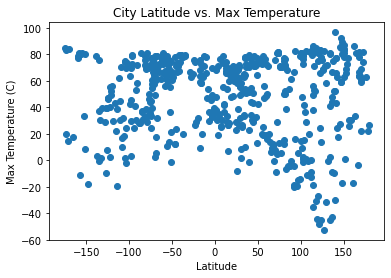

In [13]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x = city_data_df.iloc[:, 2]
y = city_data_df.iloc[:, 3]
plt.scatter(x,y)
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

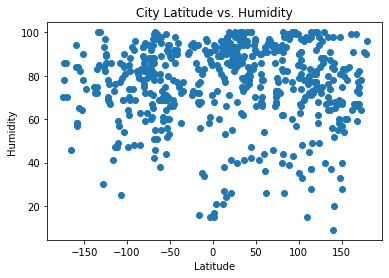

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x = city_data_df.iloc[:, 2]
y = city_data_df.iloc[:, 4]
plt.scatter(x,y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

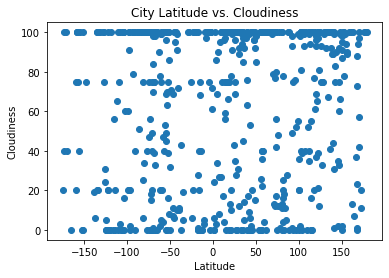

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x = city_data_df.iloc[:, 2]
y = city_data_df.iloc[:, 5]
plt.scatter(x,y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

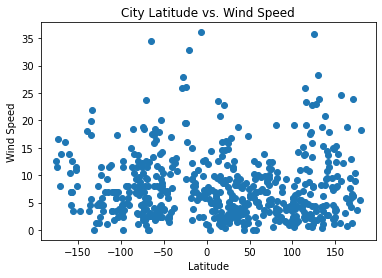

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x = city_data_df.iloc[:, 2]
y = city_data_df.iloc[:, 6]
plt.scatter(x,y)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def LR_plot(x_values,y_values):
    correlation = sts.pearsonr(x_values,y_values)
    
    print(f"""The r-squared value is {round((correlation[0]**2),2)}""")
# Add the linear regression equation and line to plot

    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    return line_eq

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,hilo,19.7297,-155.0900,81.28,82,100,3.44,US,1671240195
6,key west,24.5557,-81.7826,78.80,93,75,6.91,US,1671240047
8,clyde river,70.4692,-68.5914,5.23,78,100,0.00,CA,1671240200
9,chara,56.9064,118.2631,-30.39,81,20,0.72,RU,1671240201
11,kodiak,57.7900,-152.4072,33.31,64,0,11.50,US,1671240204


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vangaindrano,-23.3500,47.6000,71.55,94,96,4.97,MG,1671240189
1,santa maria,-29.6842,-53.8069,69.10,56,0,13.80,BR,1671240181
2,saint-philippe,-21.3585,55.7679,72.99,81,26,12.57,RE,1671240192
3,ushuaia,-54.8000,-68.3000,60.46,51,75,5.75,AR,1671240193
5,pimentel,-6.8367,-79.9342,68.88,82,100,12.59,PE,1671240196


###  Temperature vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Max Temperature vs. Latitude in the Northern Hemisphere')

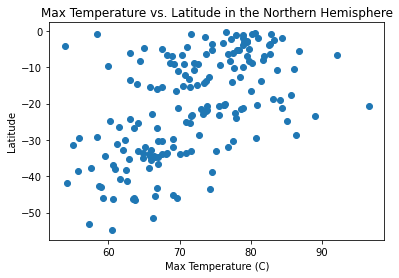

In [22]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x = southern_hemi_df.iloc[:, 3]
y = southern_hemi_df.iloc[:, 1]
plt.scatter(x,y)
plt.ylabel('Latitude')
plt.xlabel('Max Temperature (C)')
plt.title("Max Temperature vs. Latitude in the Northern Hemisphere")

# print(r_value)

The r-squared value is 0.72


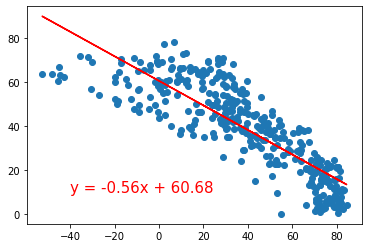

In [47]:
Best_fit_line = LR_plot(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"])
plt.annotate(Best_fit_line,(-40, 10), color="red", fontsize=15);

The r-squared value is 0.3


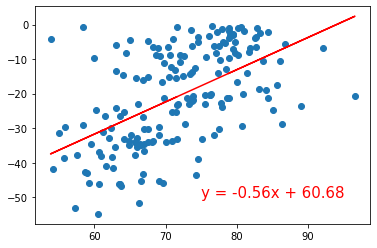

In [49]:
# Linear regression on Southern Hemisphere
South_Best_fit_line = LR_plot(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"])
plt.annotate(Best_fit_line,(75, -50), color="red", fontsize=15);

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is 0.12


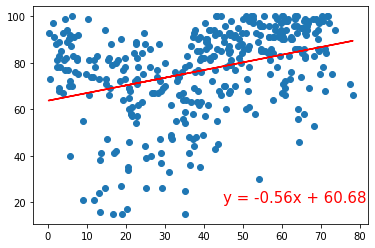

In [52]:
# Northern Hemisphere
North_Humid_Best_fit_line = LR_plot(y_values=northern_hemi_df["Humidity"], x_values=northern_hemi_df["Lat"])
plt.annotate(Best_fit_line,(45, 20), color="red", fontsize=15);

In [ ]:
# Southern Hemisphere


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE